이것만은 꼭 !!

- 평균 필터: 주변 픽셀들의 평균값 바꾸기
(가중치가 동일)
- 가우시안 필터: 조금 더 자연스럽게 흐릿하게 만들어 주는 필터
예)프로필 사진 배경 흐리게 하기
- 중간값 필터(median blur): 잡티제거(노이즈) 사용
- 양방향 필터: 경계선을 또렷하게 유지

sharpening / edge(경계, 윤곽선) detection
- 소벨(sobel) 필터 : 어디가 경계지?? 경계선을 찾아 주는 필터 (가로선, 세로선 따로 있는 경우 존재)
- 라플라시안 필터: 모든 방향의 경계선을 한번에 처리
- 캐니 엣지 필터: 가장 정밀한 필터(윤곽선만 쏙쏙 뽑아내는 필터) ex) 만화 필터


1. 라플라시안 정의
- 함수 값이 주변 값에 비해 얼마나 빠르게 변하는지 측정하기 위해 사용.
- 2차 미분(미분의 미분, 변화의 변화)

2. 1차 미분과 2차 미분 차이
- 1차 미분(derivative) : 기울기 (slope)
  - 방향(direction) / 변화량(magnitude) 알려줌
- 2차 미분: 곡률(curvature) 측정
  - 함수가 얼마나 휘어지는가?
  - 주변 평균보다 큰가? 작은가? 판단
  - min/max 또는 변곡점 탐지

회전

Cv2. getRotationMatrix2D(중심점, 각도, 크기)
- 중심점(사진 한 가운데) 기준, 각도만큼 회전해(돌려)

- 새 x 좌표(x') = 기존 x × cos(각도) - 기존 y × sin(각도)
- 새 y 좌표(y') = 기존 x × sin(각도) + 기존 y × cos(각도)

- cos 과 sin 이 왜 필요한가?
  - cos(각도) : 가로 방향으로 얼마나 이동할지
  - sin(강도) : 세로 방향으로 얼마나 이동할지

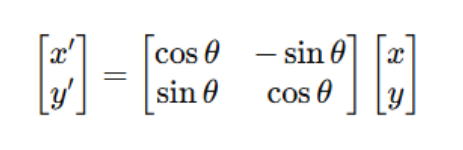

확대와 축소 (Scaling)

- 이미지(사진) 크게 만들거나 작게 만드는 것
- 예) 줌 인/아웃, 썸네일 만들기
- 어라? 문제가 발생하네... (확대)하니깐 빈 공간이 생기네. 왜냐하면 픽셀(pixel) 고정된 정해진 수니깐

- 해결방법 (보간법, 간격을 보충해 줘야지)
  - nearest: 가장 가까운 픽셀 값 복사
    (단점: 계단 현상 발생, but 가장 많이 사용)
  - linear: 주변 픽셀들의 평균
  - cubic : 더 부드럽게

- 새 x = 기존 x × sx (sx > 1이면 확대, 0 < sx < 1이면 축소)
- 새 y = 기존 y × sy

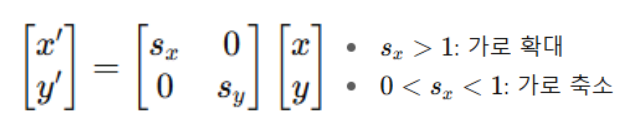

아핀 변환

- Cv2.getAffineTransform(점1, 점2), 3개의 점으로 변환을 지정함
- 직선은 직선으로 유지, 평행선은 계속 평행하게 유지

- 새 x = a₁₁×x + a₁₂×y + tx
- 새 y = a₂₁×x + a₂₂×y + ty

- a : 회전, 확대, 기울임
- t : 이동

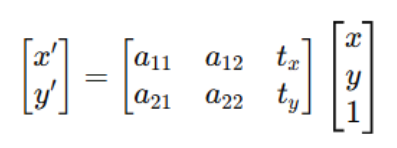

자유도 (degree of freedom)

- 기준(default) 6dof (아핀변환 default)
- 위치이동 3가지(translation): 앞뒤(surge), 좌우(sway), 위아래(heave) - x, y, z 축
- 회전이동 3가지(rotation) 끄덕끄덕(pitch), 도리도리(yaw), 갸욱갸욱(roll) - x, y, z축 회전

- 객체(물체) 공간 안에서 얼마나 자유롭게 움직이느냐 또는 상태가 변하냐(변경 가능)
- 독립적으로 제어가능한 움직임 수


외웁시다.
제목 : 자유도 (dof)
- 앞뒤 끄덕끄덕, 좌우 도리도리, 위아래 갸욱갸욱


c.f) 평면(2D)상 자유도: 3 dof
- 왜냐하면요. Z축이 없자나요.

- 앞뒤 (X축) :(평면) 전진, 후진
- 좌우이동(Y축) : (평면) 왼쪽, 오른쪽
- 평면회전(Yaw) : 제자리 돌기

Perspective 변환(원근변환)
- (***) 직선은 직선으로 유지
- 평행선은 한 점(소실점)에서 만남

- 예)
  - 비스듬하게 찍은 사진 >> 정면으로 보이게
  - 물체(객체)를 원근감 있게(가까운 것 크게, 먼 것은 작게)    
- 원본 사진에서 4개의 점 선택(사각형 모서리)
- 이 점들을 어디로 옮길지 결정


Cv2.getPerspectiveTransform(p1, p2)

p1: 원본 4개 점
p2: 목표 4개 점

- 새 x = (h₁₁×x + h₁₂×y + h₁₃) / (h₃₁×x + h₃₂×y + h₃₃)
- 새 y = (h₂₁×x + h₂₂×y + h₂₃) / (h₃₁×x + h₃₂×y + h₃₃)

- 멀수록 분모가 커지고 나눈 값이 작아짐 >> 작게 보임
- 가까우면 분모가 작아지고 나눈 값이 커짐>> 크게 보임

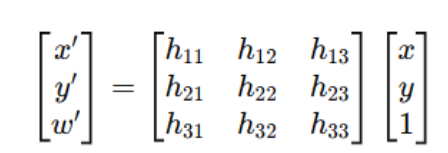

정리의 시간: Affine (아핀) vs Perspective(원근)

1) 필요한 점
- 아핀: 3개 / 원근: 4개
2) 평행선
- 아핀: 평행 유지 / 원근 : 평행 깨짐(소실점-한점)
3) 사각형 형태
- 아핀: 평행사변형 / 원근: 사다리꼴


정리합시다.
1. 확대 / 축소
- sx, sy >> 곱하기만 >> 크기가 변한다
2. 회전
- 코가 사세 >> sin(세로), cos(가로)>> 각도만 변함
3. 아핀
- a(회전, 기울기), t(이동) 곱하고 더하기 >> 직선, 평행선 유지
4. 원근
- 나누기 추가 >> 평행선 깨짐(원근감 표현)



1. 선형 변환 (곱하기, 더하기만)
- 새로운 좌표 = 행렬(a) * 원래 좌표 + 이동(t)
  - 직선은 직선, 평행선은 평행

2. 비선형 변환 (나누기 포함)
- 새로운 좌표 = (행렬*원래 좌표) / 거리계수
  - 원근감 표현


In [1]:
%pwd

'/home/kim/Desktop/AI_cours/강의_7기_AI응용_2차시_opencv_기하학적 변환'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2


# image_path = '/content/wafer.jpg'
image_path = '/home/kim/Desktop/AI_cours/강의_7기_AI응용_2차시_opencv_기하학적 변환/wafer.jpg'

In [3]:
image_path

'/home/kim/Desktop/AI_cours/강의_7기_AI응용_2차시_opencv_기하학적 변환/wafer.jpg'

In [4]:
# 이미지 사이즈
image = cv2.imread(image_path)
image.shape

(420, 420, 3)

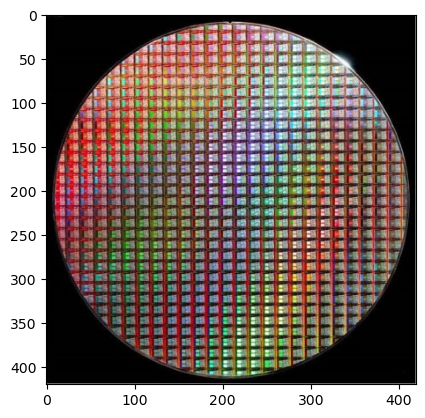

In [5]:
plt.imshow(image)

In [6]:
src = image.copy()

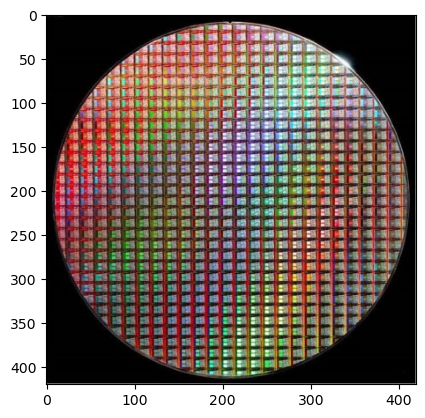

In [8]:
plt.imshow(src[:,:])

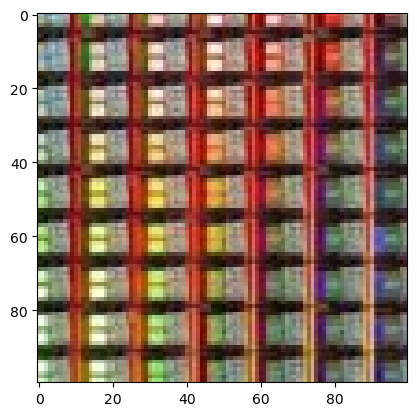

In [9]:
dst = src[250:350, 250:350]
plt.imshow(dst)

이미지 크기 변환

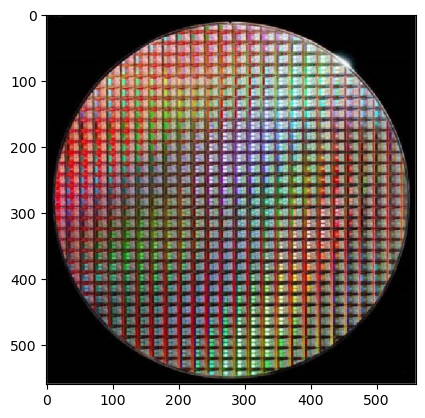

In [14]:
# openCV 크기 변환 resize()
# 보간(확대, 축소) >> 빈 값(픽셀)을 어떻게 할 것인가?
dst = cv2.resize(src, dsize=(560,560), interpolation=cv2.INTER_NEAREST)
# dsize=(560,560) destination size(목표 크기) 560, 560 pixel 로 변경 (확대)
#  interpolation 보간 (간격을 보충) : INTER_NEAREST 가장 가까운 이웃 픽셀 값 복사 (계단현상 발생가)
plt.imshow(dst)

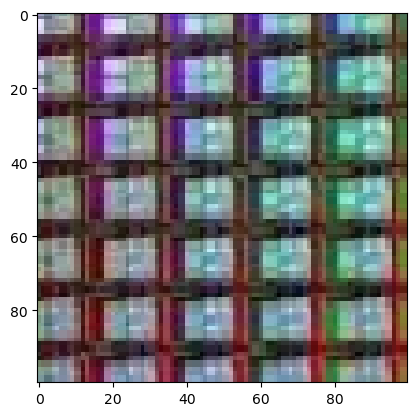

In [15]:
plt.imshow(dst[250:350,250:350])

이미지 회전

In [16]:
src.shape

(420, 420, 3)

[[  0.35355339   0.35355339  61.50757595]
 [ -0.35355339   0.35355339 210.        ]]


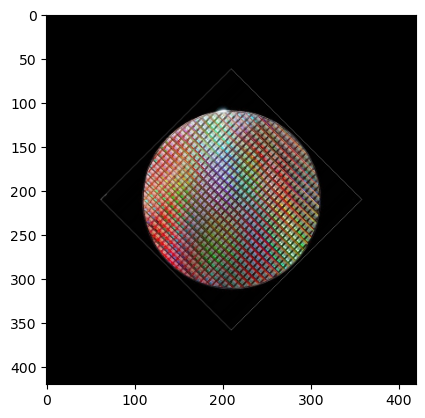

In [27]:
# 중심점 기준, 회전해야 함 >> 중심 픽셀 구해줘야 함
import cv2

src = cv2.imread(image_path)
height, width, _ = src.shape # (y,x)
# chnnel = 3(컬러) 안 사용(_)

center = (width/2, height/2) # (x,y)
# center

# 회전 각도와 스케일 명시
angle = 45
scale = 0.5

# 기하학적 변환 : 이미지 * 행렬 결과물
# getRotationMatrix2DM >> 원본에 곱합 행렬을 만들기
# warpAffine(원본 이미지, 곱할 행렬, (너비, 높이))

matrix = cv2.getRotationMatrix2D(center, angle, scale) # 변환 행렬 반환 (2,3) 원래는 
# matrix[:,2] = [0,0]
print(matrix)
dst = cv2.warpAffine(src, matrix, (width,height))

plt.imshow(dst)

In [28]:
matrix

array([[  0.35355339,   0.35355339,  61.50757595],
       [ -0.35355339,   0.35355339, 210.        ]])

In [29]:
src = cv2.imread(image_path)

mx = 0.3
# x 축 방향 여유 공간 비율 (원본 너비의 30% 추가)

#a : x축 늘리기(1>x 면 줄어들고, x>1면 늘어남)
#b : 수평 기울이기(x) - shear
#c : 수직 기울이기(y) - shear
#d : y축 늘리기

# [a, b, t1], a, b, c, d  -> 회전, 크기조절, 기울기
# [c, d, t2] t1(x), t2(y) = 이동

affine_mat = np.array([[1, 0, 100],
                      [0, 1, 100]]).astype(np.float32)
affine_mat


array([[  1.,   0., 100.],
       [  0.,   1., 100.]], dtype=float32)

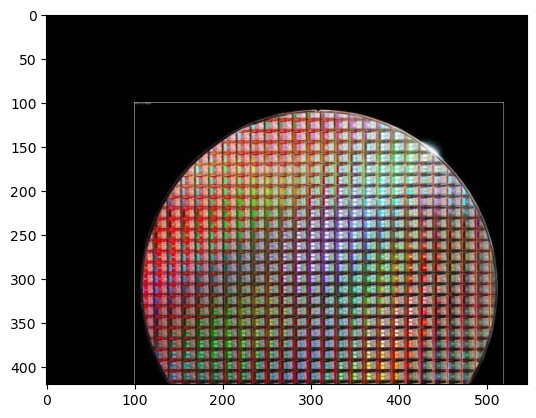

In [30]:
plt.imshow(cv2.warpAffine(src, affine_mat, (int(width+width*mx), height)))

# width*mx : 원래 너비(500), 여유공간 150(mx=0.3 30%) = 650
# height 그대로 (500)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
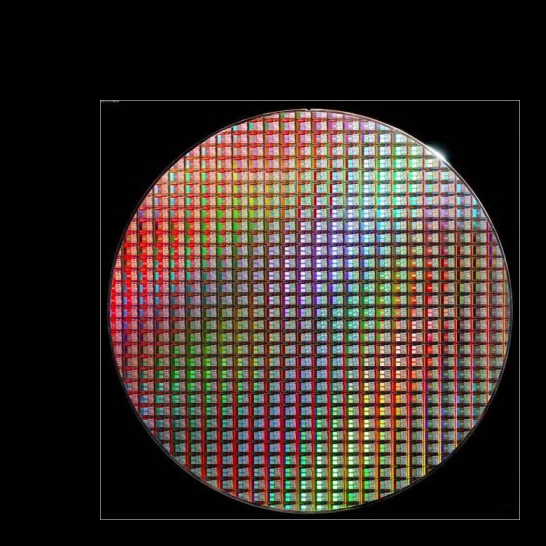

In [33]:
my = 0.3
cv2.warpAffine(src, affine_mat, (int(width+width*mx), int(height+height*my)))

# width*mx : 원래 너비(500), 여유공간 150(mx=0.3 30%) = 650
# height 그대로 (500)

보간법

In [33]:
src.shape

(420, 420, 3)

In [48]:
images[0].shape

(100, 100, 3)

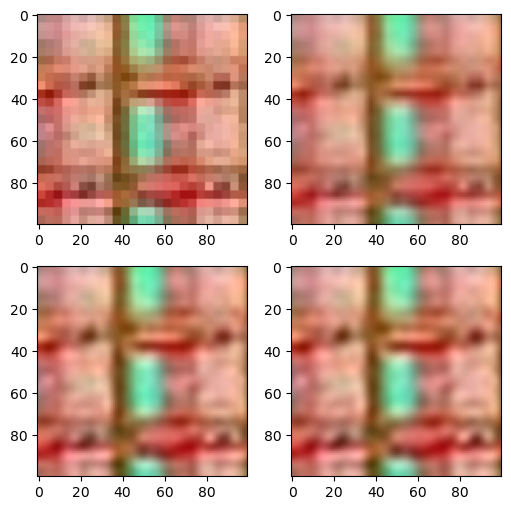

In [50]:
src = cv2.imread(image_path)

dst1 = cv2.resize(src,(0,0),fx=4,fy=4,interpolation=cv2.INTER_NEAREST)

dst2 = cv2.resize(src,(0,0),fx=4,fy=4)

dst3 = cv2.resize(src,(0,0),fx=4,fy=4,interpolation=cv2.INTER_CUBIC)

dst4 = cv2.resize(src,(0,0),fx=4,fy=4,interpolation=cv2.INTER_LANCZOS4)

images = np.array([dst1,dst2,dst3,dst4])[:,300:400,300:400]

fig, axes = plt.subplots(2,2,figsize=(6,6))
for i in range(4):
    axes[i//2,i%2].imshow(images[i])
plt.show()

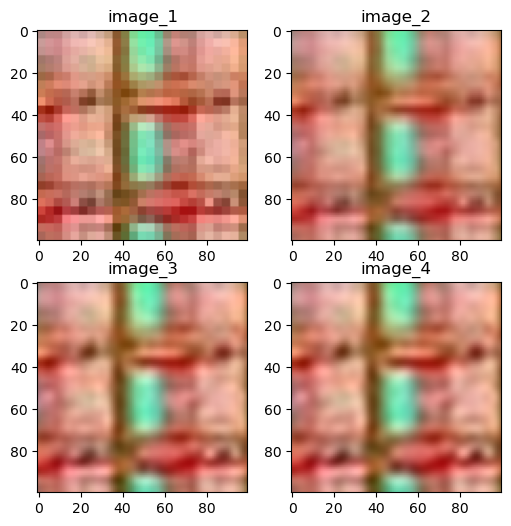

In [36]:
src = cv2.imread(image_path)

# fx =4, fy=4 : 원본을 4배씩 확대
# cv2.INTER_NEAREST 가장 가까운 픽셀 값 복사 사용하여 빈 공간 보간 (계단 현상)

dst1 = cv2.resize(src, (0,0), fx=4, fy=4, interpolation=cv2.INTER_NEAREST)
# dsize=(0,0) / dsize =(너비, 높이): 절대 크기 지정
# 픽셀 단위로 고정된 크기 지정 하지 않고(dsize 무시), 비율(배율) 사용해서 크기 조절하겠다는 의미
# dsize=(0,0) 이면, fx=4 x축을 4배 확대, fy=4 y축을 4배 확대

# plt.imshow(dst1)

# cv2.INTER_LINEAR
# 주변 2*2 픽셀의 가중 평균 계산 >> nearest 보다 느리다(평균계산해야 되니깐)
# 장점은 평균값에 몰리니깐 경계면이 부드러워진다.
dst2 = cv2.resize(src, (0,0), fx=4, fy=4)
# (420,420) : 새롭게 만들어질 이미지 크기(dsize): 해상도
# >> 순서 중요 (너비_width, 높이_height) (가로픽셀수, 세로픽셀)
# plt.imshow(dst2)

# cv2.INTER_CUBIC
# 4*4 이웃픽셀을 사용하여 빈 콧을 보간함
dst3 = cv2.resize(src, (0,0), fx=4, fy=4,interpolation = cv2.INTER_CUBIC)
# plt.imshow(dst3)

# cv2.INTER_LANCZOS4
#  8*8 이웃픽셀을 사용하여 빈 콧을 보간함
dst4 = cv2.resize(src, (0,0), fx=4, fy=4,interpolation = cv2.INTER_LANCZOS4)
# plt.imshow(dst4)

images = [dst1[300:400, 300:400], dst2[300:400, 300:400], dst3[300:400, 300:400], dst4[300:400, 300:400]]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6,6))

k = 0

for i in range(2):
  for j in range(2):
    axes[i, j].imshow(images[k])
    axes[i, j].set_title(f'image_{k+1}')
    k += 1

plt.show()

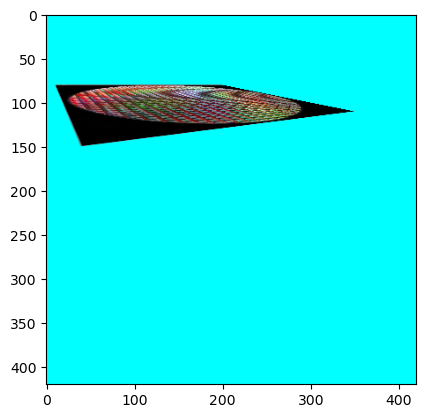

In [40]:
src = cv2.imread(image_path)
height, width, _ = src.shape # 420x420

src_pts = np.array([[0.0, 0.0],
                    [width, 0.0],
                    [width, height],
                    [0.0, height]], dtype=np.float32)
dst_pts = np.array([[10, 80],
                    [200, 80],
                    [350,110],
                    [40, 150],
                    ], dtype=np.float32)

# 변환 행렬 계산
# 원본 4 포인트(어디서 출발?) >> 목표 4 포인트(어디로 가지?)
M = cv2.getPerspectiveTransform(src_pts, dst_pts)

# 원근 변환 적용
# cv2.warpPerspective(src, M, (width, height))
dst = cv2.warpPerspective(src, M, (width, height), borderValue=(0,255,255))
# src: 원본 이미지, M: 변환 행렬, 원하는 출력 크기(width, height), borderVale(BGR) 빈공간 색상

plt.imshow(dst)
# borderValue=(0,255,255)  원래 openCV는 BGR 여야 해서 yellow 가 나와야 함
# 그런데 우리가 matplotlib 사용하다 보니 RGB로 나와서 cyan(청록색) 거예요

In [39]:
M

array([[ 6.88920012e-01, -7.48210395e-01,  1.00000000e+01],
       [ 9.46156240e-02, -4.18145036e-01,  8.00000000e+01],
       [ 1.18269530e-03, -4.45066916e-03,  1.00000000e+00]])

In [36]:
# EOS